# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Sklearn API: Linear and Polynomial regression models exercises

**Task**: fit Sklearn models to the simulated sample data. Evaluate goodnes of fit by quantitative metrics. Plot the input training and testing data together with the fitted model and the underlying function. 

* Exercise 1: Linear regression 

* Exercise 2: Non-linear (polynomial) regression 


In [103]:
import numpy as np
np.random.seed(0)

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

### **Exercise 1:** Linear regression in Sklearn
* Use **`LinearRegression`** model from `sklearn.linear_model`


In [45]:
# Process function 
def fun(x, noise):
    return .6 *  x + (x ** .8) * noise

In [46]:
# Sample training data (simulated) 
n_samples = 20
noise_factor = 0.9
# features
X_train = np.sort(np.random.rand(n_samples))

# targets (references) 
noise_train = np.random.rand(n_samples) * noise_factor
y_train = fun(X_train, noise_train) 
X_train = X_train.reshape(-1, 1)

# Sample testing data from the same underlying function 
n_samples_test = 20
# testin gfeatures
X_test = np.sort(np.random.rand(n_samples_test))

# testing targets 
noise_test = np.random.rand(n_samples_test) * noise_factor
y_test = fun(X_test, noise_test)
X_test = X_test.reshape(-1, 1)

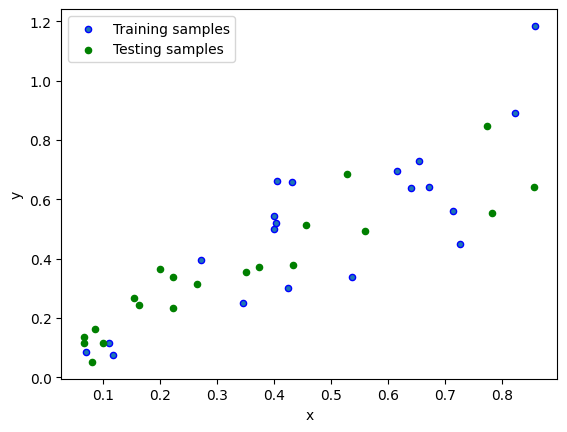

In [47]:
# Plot scatterplot (train and test data with different color), add legend 
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

### Train linear regression model

In [56]:
# instantiate model
linear_regression = LinearRegression()
# fit model on tarining data 
linear_regression.fit(X_train, y_train)

LinearRegression()

In [57]:
linear_regression.fit_intercept

True

In [58]:
linear_regression.coef_

array([0.99123458])

In [59]:
linear_regression.intercept_

0.03521018340623144

In [60]:
y_train_pred = linear_regression.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE training: {round(MSE_train, 3)}')

MSE training: 0.022


In [61]:
y_test_pred = linear_regression.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE training: {round(MSE_test, 3)}')

MSE training: 0.01


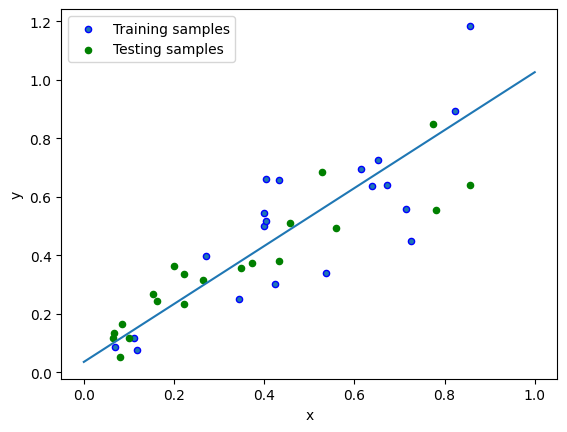

In [62]:
# Plot the linear model with samples scatter plot 

# prepare new X for plotting a line 
X_plot = np.linspace(0, 1, 100)
y_plot = linear_regression.predict(X_plot.reshape(-1, 1))
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.plot(X_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

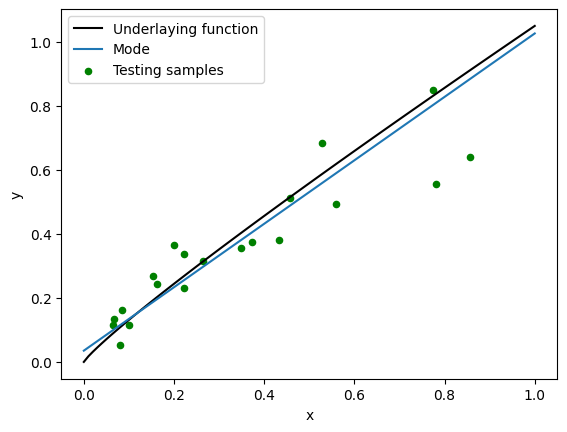

In [66]:
# Plot the underlying function of the simulated sampling process 
# together with test data and the learned model 
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.plot(X_fun, y_fun, color="k",  label="Underlying function")
plt.plot(X_plot, y_plot, label="Mode")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

### **Exercise 2:** Non-linear (polynomial) regression in Sklearn

* Use **`LinearRegression`** model from `sklearn.linear_model`. 
* Transform the input features by **`PolynomialFeatures`** from `sklearn.preprocessing`. Use `fit_transform` method. 


In [69]:
# Sample data
def fun(x, noise):
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

In [76]:
# Sample training data (simulated) 
n_samples = 20
noise_factor = 0.7
# features
X_train = np.sort(np.random.rand(n_samples))

# targets (references) 
noise_train = np.random.rand(n_samples) * noise_factor
y_train = fun(X_train, noise_train) 
X_train = X_train.reshape(-1, 1)

# Sample testing data from the same underlying function 
n_samples_test = 20
# testin gfeatures
X_test = np.sort(np.random.rand(n_samples_test))

# testing targets 
noise_test = np.random.rand(n_samples_test) * noise_factor
y_test = fun(X_test, noise_test)
X_test = X_test.reshape(-1, 1)

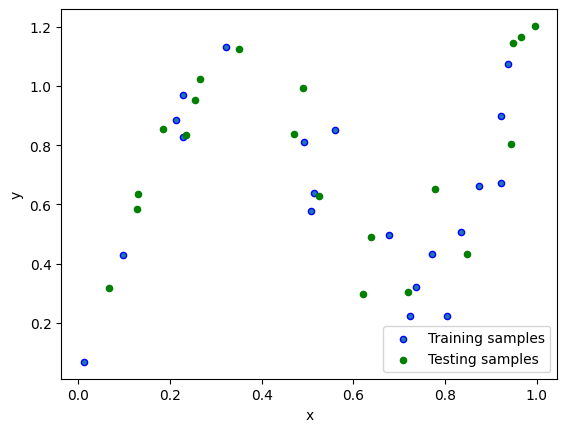

In [77]:
# Plot scatterplot (train and test data with different color), add legend 
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

In [98]:
# Transform input data to polynomials
degree = 10
# instantiate
poly = PolynomialFeatures(degree=degree, include_bias=False)
# fit_transform
polynomial_features = poly.fit_transform(X_train.reshape(-1, 1))

In [99]:
# instantiate linear regression model 
linear_regression = LinearRegression()
# fit the model 
linear_regression.fit(polynomial_features, y_train)

LinearRegression()

In [100]:
# predict (use the polynomial transform data!) for model evaluation
y_train_pred = linear_regression.predict(polynomial_features)
MSE_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE training: {round(MSE_tarin, 3)}')

MSE training: 0.108


In [101]:
# Evaluate the model on test subset
test_features = poly.fit_transform(X_test.reshape(-1, 1))
y_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, y_pred)
print(f'MSE testing: {round(MSE_test, 3)}')


MSE testing: 2.268


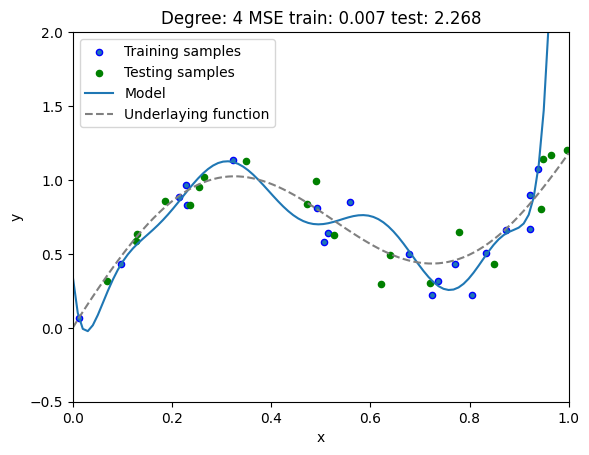

In [102]:
# Plot the input data together with the model and underlying function 

# Model data
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

# Underlying function data
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.plot(X_plot, y_plot, label="Model")
plt.plot(X_fun, y_fun, color="gray", linestyle="dashed",  label="Underlying function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-0.5, 2))
plt.legend(loc="best")
plt.title(f"Degree: {deg} MSE train: {round(MSE_train, 3)} test: {round(MSE_test, 3)}")
plt.show()